# Semeion Handwritten Digit Data Set

http://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit

In [1]:
import pandas as pd

data_set = 'data_sets/semeion.data'

names = map(str, range(0,256))

for i in range(1,11):
    names.append(str('y_%d' % i))

target_names = names[256:]  
data_names = names[:256]
 

df = pd.read_csv(data_set, index_col=False, delimiter = r"\s+", names = names )



In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 266 entries, 0 to y_10
dtypes: float64(256), int64(10)
memory usage: 3.2 MB
None
                 0            1            2            3            4  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.095417     0.153798     0.231011     0.301318     0.380414   
std       0.293883     0.360868     0.421612     0.458975     0.485641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.464532   

In [3]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
1276,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


### Средние значения цифр

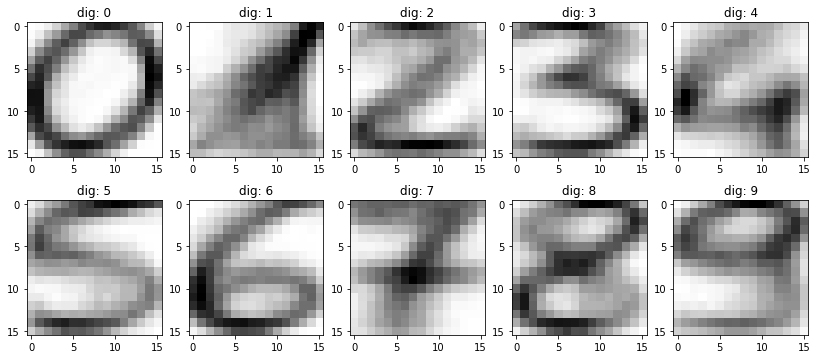

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize=(14,6))


for i in range(1,11):
    key = 'y_%d' % i 
    v = df[df[key]==1].mean(axis=0).values[:256]  
    ax = plt.subplot(2,5, i)  
    plt.title( 'dig: %d' % (i-1))
    ax.imshow(v.reshape(16,16), cmap=plt.cm.gray_r)  

plt.show()    

### Распределение по классам

<BarContainer object of 10 artists>

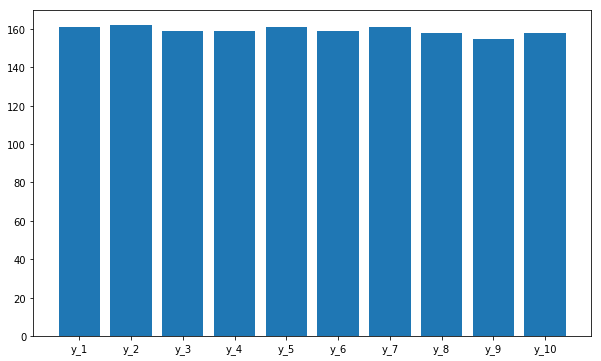

In [27]:
 
data = df[target_names].sum().values 
plt.figure(figsize = (10, 6))
plt.bar(target_names, data)


In [5]:
#import seaborn as sns

#sns.pairplot(df, hue = 'target')

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[data_names], df[target_names], test_size=0.30, random_state=42)



<BarContainer object of 10 artists>

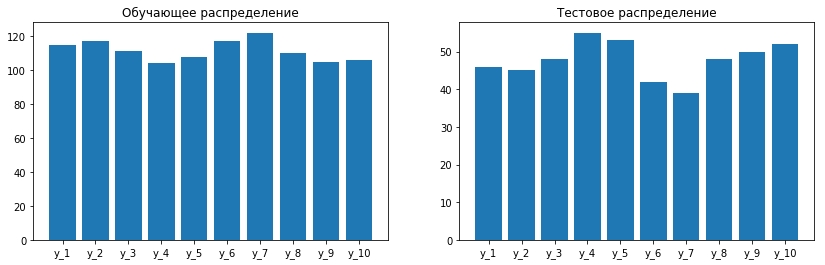

In [111]:
 
plt.figure(figsize = (14, 4))
ax = plt.subplot(1,2, 1) 
plt.title(u'Обучающее распределение')
ax.bar(target_names, y_train.sum())
ax = plt.subplot(1,2, 2) 
plt.title(u'Тестовое распределение')
ax.bar(target_names, y_test.sum())

### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


In [146]:
knn = KNeighborsClassifier(p=2) 
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test)) 



0.8786610878661087


In [147]:
print classification_report(knn.predict(X_test), y_test)


             precision    recall  f1-score   support

          0       0.98      0.92      0.95        49
          1       0.98      0.79      0.87        56
          2       0.90      0.90      0.90        48
          3       0.91      0.96      0.93        52
          4       0.89      0.98      0.93        48
          5       0.98      0.93      0.95        44
          6       0.92      0.97      0.95        37
          7       0.81      1.00      0.90        39
          8       0.70      0.97      0.81        36
          9       0.77      0.95      0.85        42

avg / total       0.89      0.93      0.91       451



### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree = DecisionTreeClassifier(random_state=42) 
tree.fit(X_train, y_train)
 
print(tree.score(X_test, y_test)) 

0.7112970711297071


In [40]:
print classification_report(tree.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.76      0.85      0.80        41
          1       0.78      0.78      0.78        45
          2       0.62      0.59      0.61        51
          3       0.85      0.78      0.82        60
          4       0.66      0.73      0.69        48
          5       0.88      0.70      0.78        53
          6       0.90      0.74      0.81        47
          7       0.52      0.64      0.57        39
          8       0.62      0.63      0.63        49
          9       0.58      0.67      0.62        45

avg / total       0.73      0.71      0.71       478



### Случайный лес

In [87]:
from sklearn.ensemble import RandomForestClassifier

#?RandomForestClassifier

In [148]:
# Стало лучше при n_estimators = 25
clf = RandomForestClassifier(n_estimators = 25, max_depth=None, random_state=42) 
clf.fit(X_train, y_train)
 
print(clf.score(X_test, y_test)) 

0.7133891213389121


In [89]:
print classification_report(clf.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.85      1.00      0.92        39
          1       0.76      0.94      0.84        36
          2       0.60      1.00      0.75        29
          3       0.80      1.00      0.89        44
          4       0.62      1.00      0.77        33
          5       0.83      1.00      0.91        35
          6       0.92      0.95      0.94        38
          7       0.60      1.00      0.75        29
          8       0.50      0.96      0.66        26
          9       0.71      0.97      0.82        38

avg / total       0.74      0.98      0.84       347



In [154]:
feat = clf.feature_importances_
print(len(feat), max(feat), min(feat), sum(feat))

(256, 0.01689916251223808, 0.0007132122369605334, 0.9999999999999996)


### Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB


In [99]:
y_train_target = y_train.dot(np.array([0,1,2,3,4,5,6,7,8,9]))
y_test_target = y_test.dot(np.array([0,1,2,3,4,5,6,7,8,9]))

print(len(y_train_target), len(y_test_target))

(1115, 478)


In [100]:
clf = GaussianNB() 
clf.fit(X_train, y_train_target)
 
print(clf.score(X_test, y_test_target)) 

0.7907949790794979


In [101]:
print classification_report(clf.predict(X_test), y_test_target)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        46
          1       0.93      0.46      0.62        91
          2       0.52      1.00      0.68        25
          3       0.84      0.90      0.87        51
          4       0.72      0.86      0.78        44
          5       0.83      0.95      0.89        37
          6       0.90      0.71      0.80        49
          7       0.96      0.87      0.91        53
          8       0.56      0.68      0.62        41
          9       0.75      0.95      0.84        41

avg / total       0.83      0.79      0.79       478



### Нейронная сеть

In [113]:
from sklearn.neural_network import MLPClassifier


In [139]:
# Стало лучше за счет L2 alpha=0.02

clf = MLPClassifier(alpha=0.02, hidden_layer_sizes=(200, ), random_state=42) 
clf.fit(X_train, y_train)
 
print(clf.score(X_test, y_test)) 

0.8619246861924686


In [140]:
print classification_report(clf.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       0.93      0.96      0.95        45
          1       0.96      0.90      0.92        48
          2       0.96      0.96      0.96        48
          3       0.87      0.98      0.92        49
          4       0.89      0.90      0.90        52
          5       0.90      0.95      0.93        40
          6       0.95      1.00      0.97        37
          7       0.88      0.95      0.91        44
          8       0.72      0.95      0.82        38
          9       0.90      0.85      0.88        55

avg / total       0.90      0.94      0.92       456

